In [27]:
import torch
import numpy as np

def positive_rate_disparity(eval_pred, eval_groups):
    """
    Compute the positive disparity.
    :param eval_true: Evaluation labels.
    :param eval_pred: Evaluation predictions.
    :return: Positive disparity.
    """
    eval_pred = torch.sigmoid(eval_pred)
    
    intra_group = (eval_groups == 0) | (eval_groups == 2)
    inter_group = (eval_groups == 1)
    
    probability_of_a_link_given_group = lambda preds, group_size: torch.sum(preds * (1 / group_size))
    
    p_eval_intra_group, p_eval_inter_group = probability_of_a_link_given_group(eval_pred[intra_group], intra_group.sum()), probability_of_a_link_given_group(eval_pred[inter_group], inter_group.sum())
    return (p_eval_inter_group - p_eval_intra_group).abs()


def true_positive_rate_disparity(eval_true, eval_pred, eval_groups):
    """
    Compute the positive disparity.
    :param eval_true: Evaluation labels.
    :param eval_pred: Evaluation predictions.
    :return: True Positive disparity.
    """
    # import code
    # code.interact(local={**locals(), **globals()})
    eval_pred = torch.sigmoid(eval_pred)
    
    intra_group = ((eval_groups == 0) | (eval_groups == 2)) & (eval_true == 1)
    inter_group = (eval_groups == 1) & (eval_true == 1)
    
    probability_of_a_link_given_group = lambda preds, group_size: torch.sum(preds * (1 / group_size))

    p_eval_intra_group, p_eval_inter_group = probability_of_a_link_given_group(eval_pred[intra_group], intra_group.sum()), probability_of_a_link_given_group(eval_pred[inter_group], inter_group.sum())
    return (p_eval_inter_group - p_eval_intra_group).abs()


def compute_all_metrics(targets, preds, groups):
    results = {}

    k = targets.sum()
    results[f'true_pos_rate_disparity'] = true_positive_rate_disparity(targets, preds, groups)
    results[f'pos_rate_disparity'] = positive_rate_disparity(preds, groups)
    # results[f'prec@100'] = precision_at_k(targets, preds, 100)
    # results[f'prec@1000'] = precision_at_k(targets, preds, 1000)

    # for k in [10, 100, 1000]:
    #     results[f'hits@{k}'] = hits_at_k(targets, preds, k)
    # results[f'mrr'] = mean_reciprocal_rank(targets, preds)
    # results[f'auc'] = auc(targets.int(), preds)
    # results[f'ap'] = average_precision(targets.int(), preds)

    return results


def calculate_mean_and_stddev(dict_list):
    
    if not dict_list:
        raise ValueError("Input list of dictionaries is empty")

    keys = dict_list[0].keys()
    result_mean = {}
    result_stddev = {}

    for key in keys:
        values = [d[key] for d in dict_list]
        mean = np.mean(values)
        stddev = np.std(values, ddof=1)  # Use ddof=1 for sample standard deviation

        result_mean[key] = mean
        result_stddev[key] = stddev

    return result_mean, result_stddev

def format_keys(dict1, dict2):
    keys = dict1.keys()
    final_dict = {}
    for key in keys:
        places = 4
            
        final_dict[key] = str(round(dict1[key], places)) + ' ± ' + str(round(dict2[key], places))
        
    return final_dict



def results2latex(cols:list, rows:dict):
    """
    cols: list of column names
    rows: dictionary of rows, where keys are row names and values are dictionaries of values for each column
    """
    # Header
    latex = '\\begin{table*}[t]\n'
    latex += '\\centering\n'
    latex += '\\caption{Results}\n'
    latex += '\\label{tab:results}\n'
    latex += '\\begin{tabular}{l' + 'c' * len(cols) + '}\n'
    latex += '\\toprule\n'
    latex += ' & '.join(cols) + ' \\\\\n'
    latex += '\\midrule\n'
    
    # Rows
    for row_name, row_values in rows.items():
        latex += row_name + ' & ' + ' & '.join(row_values) + ' \\\\\n'
    
    # Footer
    latex += '\\bottomrule\n'
    latex += '\\end{tabular}\n'
    latex += '\\end{table*}\n'
    
    return latex

# Facebook

## Intervention

In [31]:
files_adv = ["/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-114404/preds/facebook_0_149_adv.pth",
"/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-114404/preds/facebook_1_149_adv.pth",
"/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-103352/preds/facebook_1_149_adv.pth"]

files = ["/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-114404/preds/facebook_0_149.pth",
"/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-114404/preds/facebook_1_149.pth",
"/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-103352/preds/facebook_1_149.pth"]

facebook = [torch.load(i) for i in files]
facebook_adv = [torch.load(i) for i in files_adv]

facebook_results = []
for results, results_adv in zip(facebook, facebook_adv):
    facebook_results.append(compute_all_metrics(results['test_true'], results['test_pred'], results_adv['test_groups']))
    
mean, std = calculate_mean_and_stddev(facebook_results)
format_keys(mean, std)


{'true_pos_rate_disparity': '0.0159 ± 0.0058',
 'pos_rate_disparity': '0.0097 ± 0.0072'}

## Baseline

In [ ]:
files_adv = ["/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-114404/preds/facebook_0_149_adv.pth",
"/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-114404/preds/facebook_1_149_adv.pth",
"/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-103352/preds/facebook_1_149_adv.pth"]

files = ["/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-114404/preds/facebook_0_149.pth",
"/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-114404/preds/facebook_1_149.pth",
"/home/jrm28/fairness/subgraph_sketching-original/src/results/facebook_20240115-103352/preds/facebook_1_149.pth"]

facebook = [torch.load(i) for i in files]
facebook_adv = [torch.load(i) for i in files_adv]

facebook_results = []
for results, results_adv in zip(facebook, facebook_adv):
    facebook_results.append(compute_all_metrics(results['test_true'], results['test_pred'], results_adv['test_groups']))
    
mean, std = calculate_mean_and_stddev(facebook_results)
format_keys(mean, std)

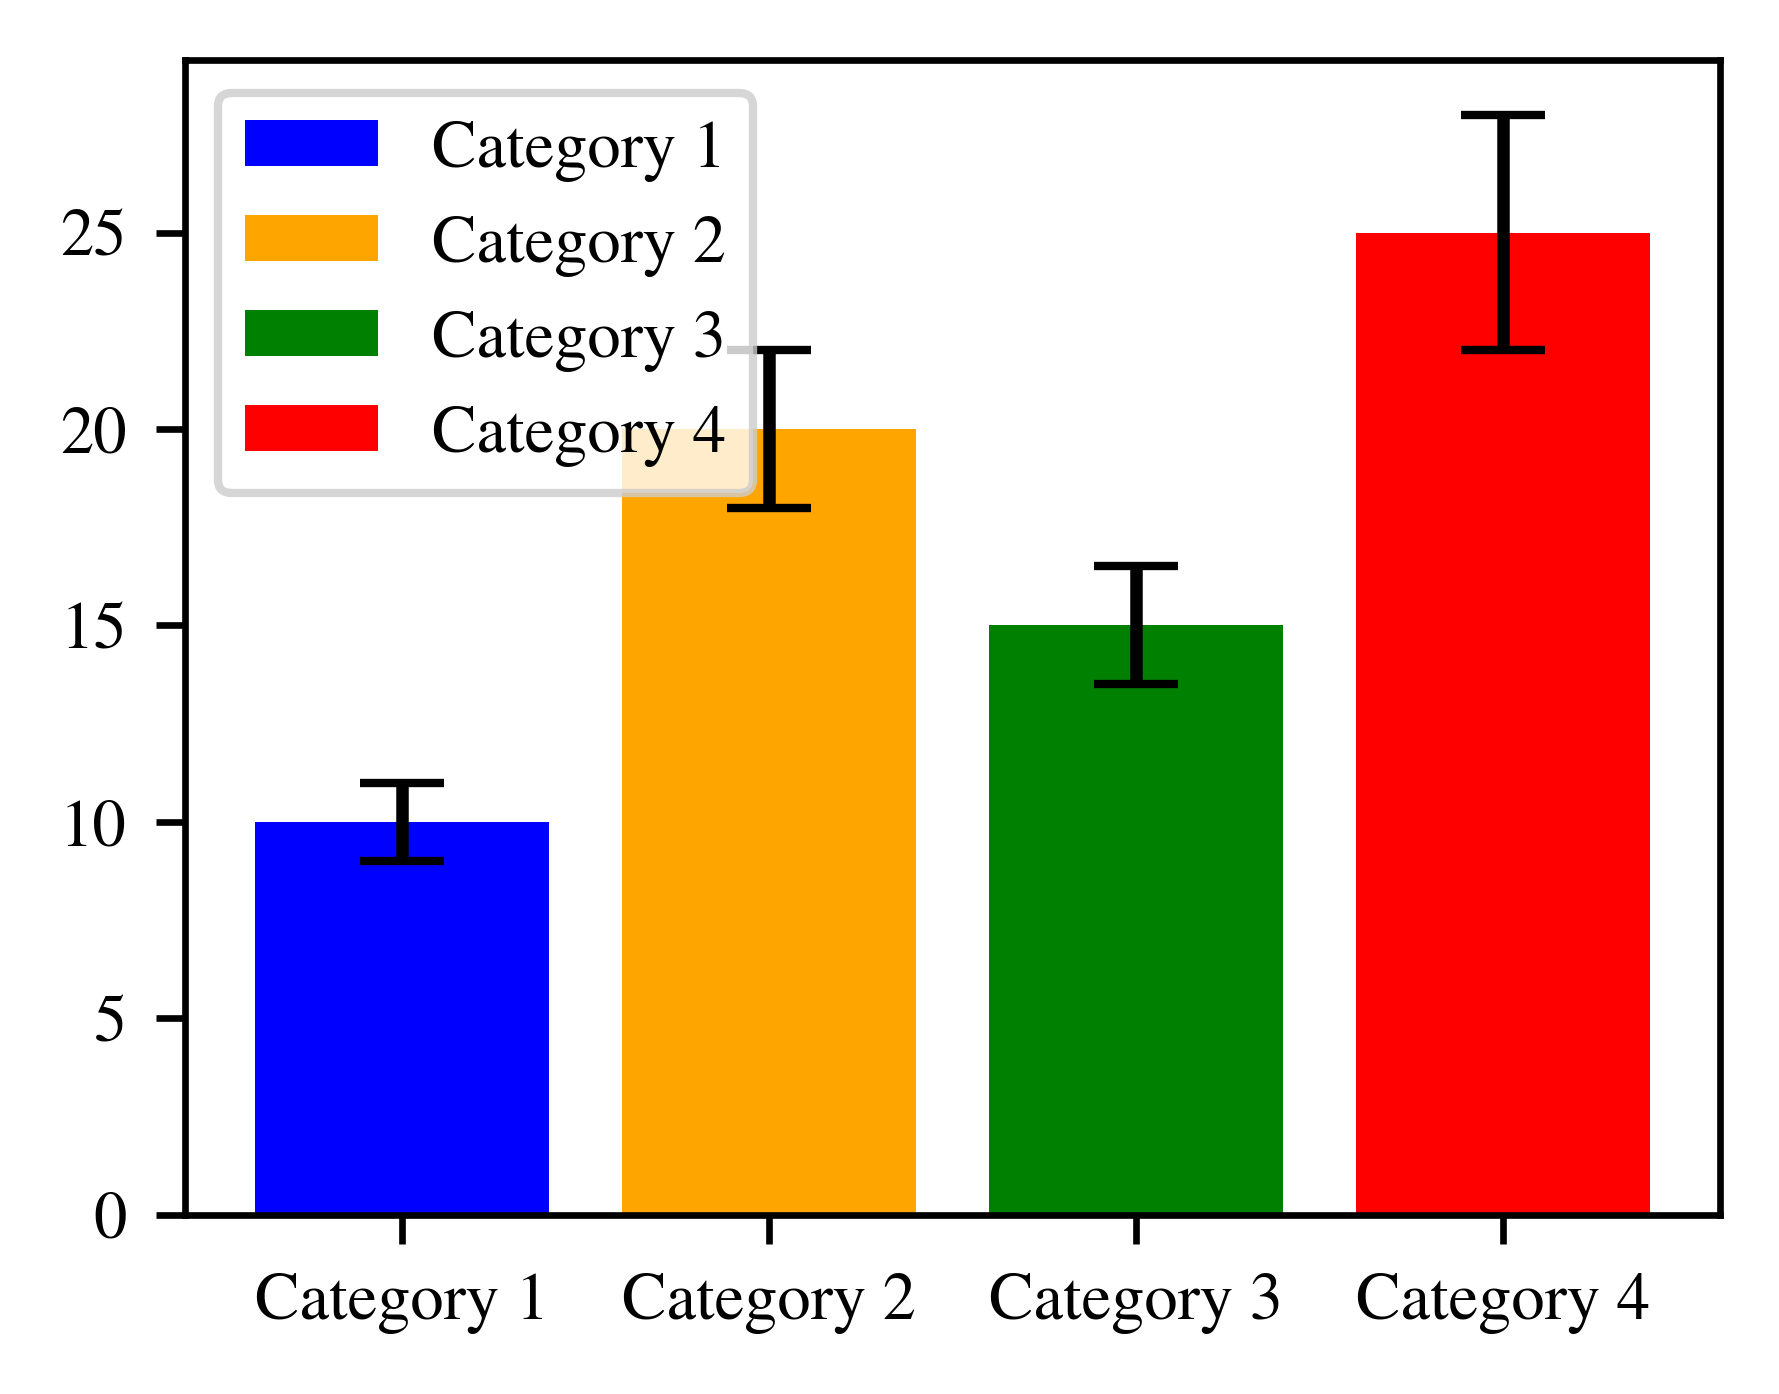

In [33]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

plt.style.use('ieee')

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
values = [10, 20, 15, 25]
errors = [1, 2, 1.5, 3]
colors = ['blue', 'orange', 'green', 'red']

# Plotting the bar plot with error bars
bars = plt.bar(categories, values, color=colors, yerr=errors, capsize=5)

# Adding legend
plt.legend(bars, categories)

# Show the plot
plt.show()